In [1]:
from Define_Model.FilterLayer import FreqTimeReweightLayer, get_weight
import torch
import kaldiio
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
ftl = FreqTimeReweightLayer()
# x = torch.randn(2, 1, 300, 161)
sample = kaldiio.load_mat('/home/yangwenhao/local/project/lstm_speaker_verification/data/vox2/klsp/spect/dev/raw_spect_dev.1.ark:26')
chunk_sample = sample[300:]
x = torch.tensor(chunk_sample).unsqueeze(0).unsqueeze(0)
x -= x.mean(dim=-2, keepdim=True)

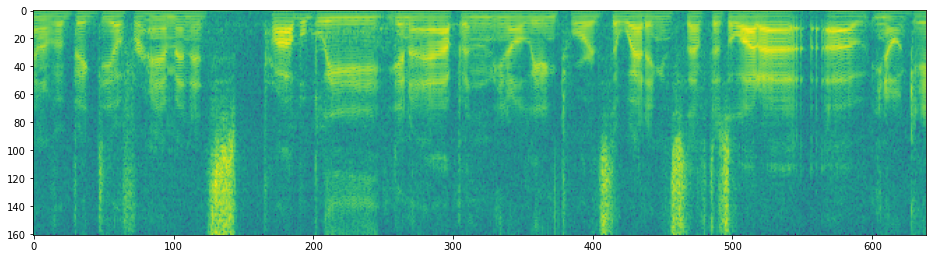

In [3]:
plt.figure(figsize=(16, 6))

plt.imshow(chunk_sample.T)

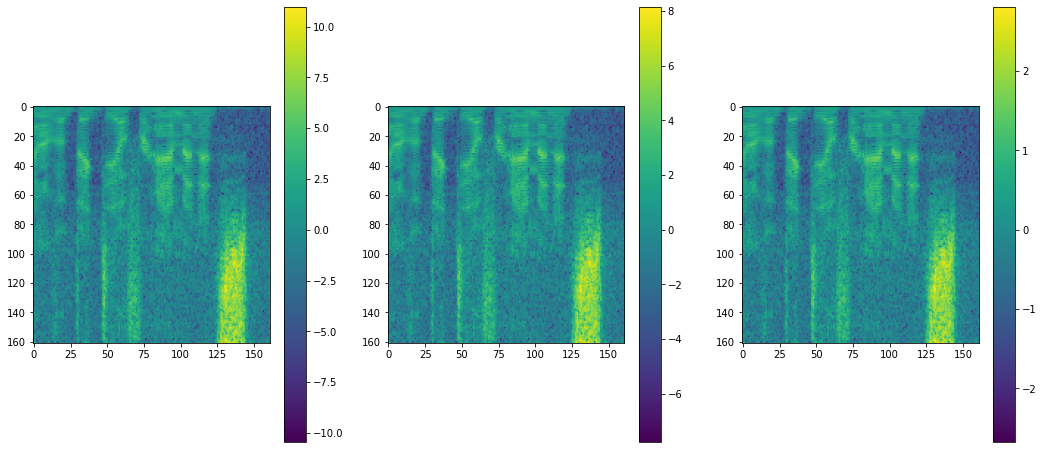

In [9]:
y = ftl(x)

plt.figure(figsize=(18, 8))
plt.subplot(1,3,1)
plt.imshow(x.squeeze().detach().numpy().T[:,:161])
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(y.squeeze().detach().numpy().T[:,:161])
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow((x-y).squeeze().detach().numpy().T[:,:161])
plt.colorbar()

In [5]:
mel = get_weight(weight='mel', input_dim=161, power_weight='')

In [6]:
ftl.weight.data *= torch.tensor((mel-mel.mean())*10).reshape(1,1,1,-1)

In [41]:
ftl.weight.data

tensor([[[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1.]]]])

In [26]:
mel.shape

(161,)

In [ ]:
x - y 